In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import time

from sklearn.ensemble import BaggingRegressor



In [16]:
df = pd.read_csv("data/housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [17]:
y = df["MEDV"]
X = df.drop("MEDV", axis=1)

X.isnull().sum()


RM         0
LSTAT      0
PTRATIO    0
dtype: int64

## Custom Implementation

In [18]:
from bagging import BaggingRegressor as BaggingCustom
from sklearn.metrics import r2_score

start_time = time.time()

model1 = BaggingCustom(max_depth=10,n_estimators=20)

model1.fit(X, y)

pred = model1.predict(X)

end_time = time.time()

time_taken = (end_time - start_time)
r2_custom_model_value = r2_score(y, pred)

print(f"Time taken: {time_taken} seconds")

print(f"R2 Score: {r2_custom_model_value}")



Time taken: 0.19521117210388184 seconds
R2 Score: 0.977507535603145


## Sklearn

In [19]:
from sklearn.tree import DecisionTreeRegressor

start_time = time.time()

base_model = DecisionTreeRegressor(max_depth=10)
model2 = BaggingRegressor(n_estimators=20, estimator=base_model)

model2.fit(X, y)
pred = model2.predict(X)

end_time = time.time()

time_taken_sklearn = (end_time - start_time)
r2_sklearn_model_value = r2_score(y, pred)

print(f"Time taken: {time_taken_sklearn} seconds")

print(f"R2 Score: {r2_sklearn_model_value}")







Time taken: 0.0697166919708252 seconds
R2 Score: 0.9633475241789582


## Cross Validation

In [20]:
def cross_validation(model,X, y, n_folds=5):
    scores = []
    for _ in range(n_folds):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        scores.append(r2_score(y_test, pred))
    return scores

custom_r2_scores = np.mean(cross_validation(model1,X, y, 10))
sklearn_r2_scores = np.mean(cross_validation(model2,X, y, 10))

print(f"Custom Model R2 Scores: {custom_r2_scores}")
print(f"Sklearn Model R2 Scores: {sklearn_r2_scores}")




Custom Model R2 Scores: 0.8042878554317026
Sklearn Model R2 Scores: 0.7854245337059836


## Comparison

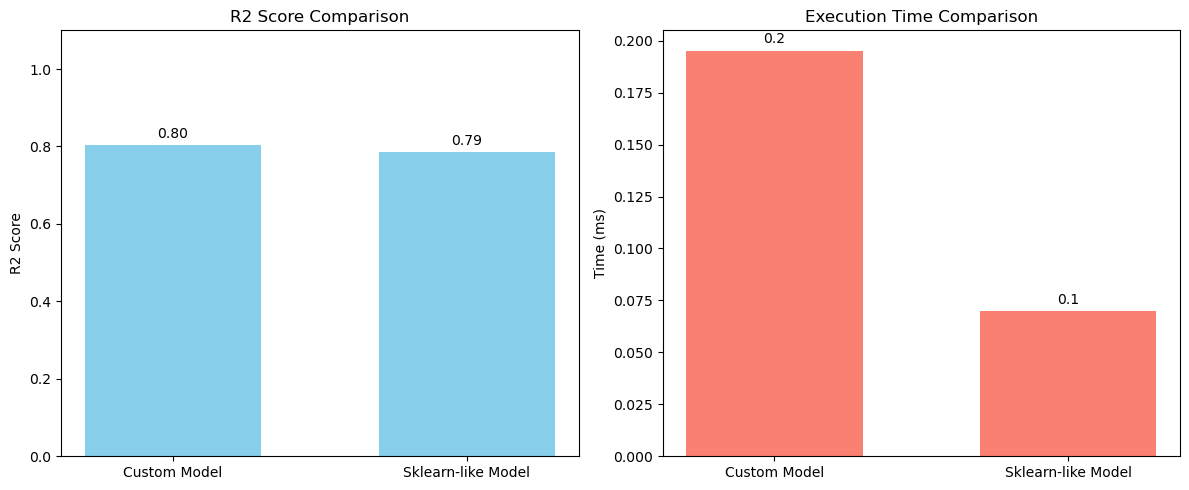

In [21]:
# Setup for plotting
model_names = ['Custom Model', 'Sklearn-like Model']
r2_scores_plot = [custom_r2_scores, sklearn_r2_scores]
time_taken_plot = [time_taken, time_taken_sklearn]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Set positions for bars
x = np.arange(len(model_names))
width = 0.6

# Create R2 Score bars
bars1 = ax1.bar(x, r2_scores_plot, width, color='skyblue')
ax1.set_ylabel('R2 Score')
ax1.set_title('R2 Score Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names)
ax1.set_ylim(0, 1.1)  # Set y-axis limit for R2 scores

# Create Time bars
bars2 = ax2.bar(x, time_taken_plot, width, color='salmon')
ax2.set_ylabel('Time (ms)')
ax2.set_title('Execution Time Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names)

# Add value labels on the bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height:.1f}',
                xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()